# Lecture 0 — Python Crash Course + Simple ML Workflow

**Course:** BME i9400 — Special Topics in Machine Learning (Graduate, Biomedical Engineering)  
**Environment:** JupyterHub (CPU-only friendly)  
**Date generated:** 2025-08-24 18:43 UTC  

This notebook is a hands-on crash course designed to ensure every student is ready for the rest of the course.  
It covers Python essentials, NumPy, Pandas, plotting, and a complete ML workflow (regression & classification) with scikit-learn.

> **Micro‑Deliverable** described at the end of the notebook. Due before the end of lecture. 

## 0. Reproducibility & Versions

In [22]:
import sys, platform, random, os, textwrap, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

Python: 3.13.0
Platform: macOS-14.2-arm64-arm-64bit-Mach-O
NumPy: 2.1.2
Pandas: 2.2.3
Matplotlib: 3.9.2


## 1. Python Essentials

### 1.1 Variables, Types, and Collections

- Numeric types: `int`, `float`
- Text: `str`
- Boolean: `bool`
- Collections: `list`, `tuple`, `dict`, `set`

In [23]:
age = 34               # int
height_m = 1.78        # float
name = "Ada Lovelace"  # str
is_patient = False     # bool

ages = [29, 33, 41, 37, 29]     # list
vitals = ("HR", "BP", "Temp")   # tuple
record = {"id": 101, "age": 33, "bp_sys": 122}  # dict
unique_ids = {101, 102, 103}    # set

print(type(age), type(height_m), type(name), type(is_patient))
print(ages[:3], vitals[0], record["bp_sys"], 101 in unique_ids)

<class 'int'> <class 'float'> <class 'str'> <class 'bool'>
[29, 33, 41] HR 122 True


In [24]:
# Demonstrate arithmetic and string operations
bmi = 72 / (height_m ** 2)  # BMI calculation
bmi_rounded = round(bmi, 1)  # round to 1 decimal
greeting = f"Hello, {name}!"  # f-string formatting
print(f"BMI: {bmi_rounded}, Greeting: {greeting}")

BMI: 22.7, Greeting: Hello, Ada Lovelace!


### 1.2 Control Flow & Comprehensions

In [25]:
# if/elif/else
if height_m > 1.9:
    category = "tall"
elif height_m > 1.7:
    category = "medium"
else:
    category = "short"
category

'medium'

In [26]:
# for loop + enumerate
for i, a in enumerate(ages):
    if i < 3:
        print(i, a)

0 29
1 33
2 41


In [27]:
# list comprehension
ages_plus_one = [a + 1 for a in ages]
ages_even = [a for a in ages if a % 2 == 0]
ages_plus_one[:5], ages_even[:5]

([30, 34, 42, 38, 30], [])

### 1.3 Functions

In [28]:
def bmi(weight_kg: float, height_m: float) -> float:
    """Compute Body Mass Index."""
    return weight_kg / (height_m ** 2)

def classify_bmi(bmi_value: float) -> str:
    return ("underweight" if bmi_value < 18.5 else
            "normal" if bmi_value < 25 else
            "overweight" if bmi_value < 30 else
            "obese")

val = bmi(72, 1.78)
val, classify_bmi(val)

(22.724403484408533, 'normal')

## 2. NumPy Essentials

Key concepts: arrays, shapes, broadcasting, vectorization, random generation.

In [29]:
import numpy as np
np.random.seed(SEED)

# Simulate systolic blood pressure (BP) as a normal distribution
bp = np.random.normal(loc=120, scale=12, size=1000)  # mean 120, sd 12
bp.shape, bp.mean().round(2), bp.std(ddof=1).round(2)

((1000,), np.float64(120.23), np.float64(11.75))

In [30]:
# Vectorized operations: z-score normalize
bp_z = (bp - bp.mean()) / bp.std()  # Q: what does this operation do to the bp values?
bp_z[:5].round(3)

array([ 0.488, -0.161,  0.642,  1.536, -0.259])

In [31]:
# Broadcasting demo: add patient-specific offsets
offsets = np.random.uniform(-5, 5, size=5)
bp5 = bp[:5]
bp5 + offsets

array([122.63539566, 114.38650679, 129.13656495, 140.34111554,
       112.50602095])

## 3. Pandas Essentials

We'll create a small synthetic EHR-like table: age, BMI, systolic BP, outcome.

In [32]:
import pandas as pd
np.random.seed(SEED)

N = 400
age = np.random.randint(18, 85, size=N)
bmi_vals = np.random.normal(26, 4.5, size=N).clip(15, 45)
bp_sys = np.random.normal(120 + 0.4*(age-50) + 0.8*(bmi_vals-25), 10, size=N)
# Binary outcome (e.g., hypertension diagnosis) with logistic link to bp_sys + age
logit = -12 + 0.06*bp_sys + 0.015*age
prob = 1 / (1 + np.exp(-logit))
y = (np.random.rand(N) < prob).astype(int)

df = pd.DataFrame({
    "age": age,
    "bmi": bmi_vals,
    "bp_sys": bp_sys,
    "y": y
})

# Inspect our DataFrame
df

,age,bmi,bp_sys,y
0,69,25.872103,142.447320,0
1,32,18.276090,108.671332,0
2,78,21.306674,125.677169,0
3,38,31.969123,131.018164,0
4,41,28.018919,102.589899,0
...,...,...,...,...
395,19,22.778856,93.223885,0
396,52,26.493797,109.030020,0
397,25,25.172287,95.011875,0
398,43,28.312079,103.482414,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bmi     400 non-null    float64
 2   bp_sys  400 non-null    float64
 3   y       400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,400.0,51.155000,20.019439,18.000000,34.000000,50.000000,69.000000,84.000000
bmi,400.0,25.982565,4.791752,15.000000,22.708417,26.198120,29.362250,39.392886
bp_sys,400.0,122.601323,14.589270,80.776796,111.611969,122.385248,133.248168,160.051981
y,400.0,0.027500,0.163740,0.000000,0.000000,0.000000,0.000000,1.000000


## 4. Plotting with Matplotlib

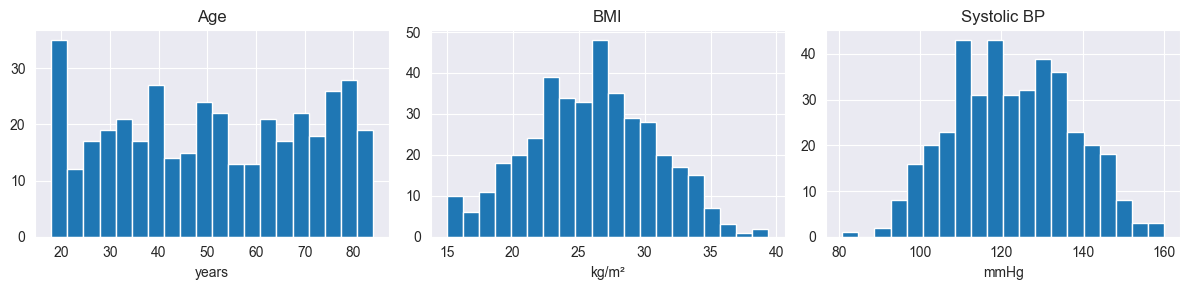

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(df["age"], bins=20); axes[0].set_title("Age"); axes[0].set_xlabel("years")
axes[1].hist(df["bmi"], bins=20); axes[1].set_title("BMI"); axes[1].set_xlabel("kg/m²")
axes[2].hist(df["bp_sys"], bins=20); axes[2].set_title("Systolic BP"); axes[2].set_xlabel("mmHg")
plt.tight_layout()
plt.show()

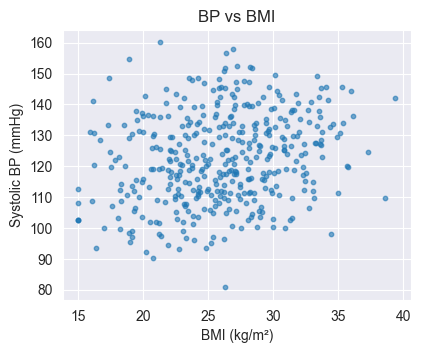

In [36]:
plt.figure(figsize=(4.5,3.5))
plt.scatter(df["bmi"], df["bp_sys"], s=10, alpha=0.6)
plt.xlabel("BMI (kg/m²)"); plt.ylabel("Systolic BP (mmHg)"); plt.title("BP vs BMI")
plt.show()

## 5. Simple ML Workflow Overview

We'll demonstrate a simple **Regression** task:

- Predict `y` (hypertension diagnosis) from the patient's age and bmi.

We will demonstrate:
- splitting up the data into training and test sets
- preprocessing the data prior to fitting the model
- computing metrics that evaluate the accuracy of the model

### 5.1 Regression: Predicting Systolic BP

In [37]:
# The next 6 lines import the necessary libraries for machine learning.
# You do not need to understand them all right now, but they are essential for building and evaluating machine learning models.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


In [38]:
# In Machine Learning, "x" is often used to denote features (inputs) and "y" for targets (outputs).
# In other words, we are most often interested in predicting "y" from "x".
# x often spans more than one feature, so we use "X" to denote the feature matrix.
# In this case, we will predict systolic blood pressure (bp_sys) from age and
# body mass index (bmi).

# Create feature matrix X and target vector y
X = df[["age", "bmi"]].copy()
y_reg = df["bp_sys"].copy()


In [39]:
# In ML, it is not permissible to train and test on the same data.
# This means that we need to split our data into a "training" set and a "test" set.
# The training set is used to fit the model, while the test set is used to evaluate its performance.
# We will use a 75%/25% split, which is common in practice.
# We also set a random seed for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.25, random_state=SEED)


In [40]:
# This step is a bit advanced, but it is important to understand.
# It is good practice to standardize numerical features before training a model.
# Standardization means that we will scale the features to have mean 0 and standard deviation
# 1. This is important because many models (e.g., linear regression) assume that the features are
# centered around 0 and have similar scales.
# 2. Standardization is also important for allowing the optimization algorithms to converge faster.
# We will use a `ColumnTransformer` to apply the `StandardScaler` only to the
# numerical features (age and bmi).

num_features = ["age", "bmi"]
preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(), num_features)],
    remainder="drop"
)

# Here we create a regression model pipeline.
# The pipeline consists of two steps:
# 1. Preprocessing: Standardizing the numerical features.
# 2. Regression: Fitting a linear regression model.
reg_model = Pipeline([
    ("prep", preprocess),
    ("lr", LinearRegression())
])


In [41]:
# Fit the regression model on the training data
reg_model.fit(X_train, y_train) # This is the core step where the model learns from the data!

# Evaluate the model on the test set
pred = reg_model.predict(X_test) # Also a core step, where we use the model to make predictions on unseen data.

# Calculate metrics: Mean Absolute Error (MAE) and R² score
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"The model's performance on the test set:")
print(f"MAE: {mae:.2f} mmHg")
print(f"R²: {r2:.3f}")

The model's performance on the test set:
MAE: 7.83 mmHg
R²: 0.494


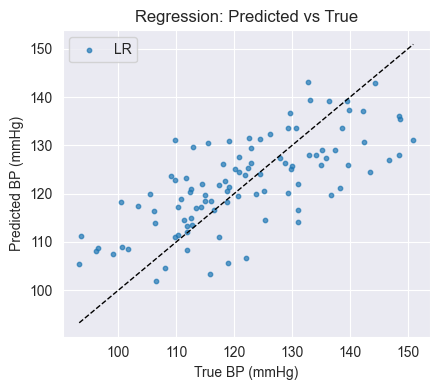

In [42]:
# Plot predicted vs true
plt.figure(figsize=(4.5,4))
plt.scatter(y_test, pred, s=10, alpha=0.7, label="LR")
lims = [min(y_test.min(), pred.min()), max(y_test.max(), pred.max())]
plt.plot(lims, lims, 'k--', linewidth=1)
plt.xlabel("True BP (mmHg)")
plt.ylabel("Predicted BP (mmHg)")
plt.title("Regression: Predicted vs True")
plt.legend()
plt.tight_layout()
plt.show()

## 7. Micro‑Deliverable

**Complete the following tasks:**
1. Create a copy of this notebook and rename it to `lecture00_yourname.ipynb`
2. Run all cells to ensure everything works correctly.
3. Provide answers to the questions in the cell below.
4. Place your completed notebook in your "my-work" folder on JupyterHub.

## 8. Questions

Q1. How would you interpret the MAE and R² values in the context of this regression task?

#### ANSWER HERE ####

Q2. How would you explain the meaning of MAE to a lay person?

#### ANSWER HERE ####

Q3. How would you explain the meaning of R² to a lay person?

#### ANSWER HERE ####